In [2]:
import pandas as pd
# Read from the JSON file
def load_series_from_json(filename):
    loaded_series = pd.read_json(filename)
    return loaded_series

In [3]:
filename = 'ranked_train'
ranked_train = load_series_from_json(filename)

filename = 'ranked_dev'
ranked_dev = load_series_from_json(filename)

In [6]:
print(ranked_train['tfidf_topk'][0][:10])

['htlvpvz5', '32z7b3fp', 'dbgtslc8', '52cub1om', 'h7hj64q5', 'trmwm9qq', '65gedo6u', 'rwgqkow3', 'am11yqbf', 'tpovr13h']


In [7]:
print(ranked_train)

       post_id                                         tweet_text  cord_uid  \
0            0  Oral care in rehabilitation medicine: oral vul...  htlvpvz5   
1            1  this study isn't receiving sufficient attentio...  4kfl29ul   
2            2  thanks, xi jinping. a reminder that this study...  jtwb17u8   
3            3  Taiwan - a population of 23 million has had ju...  0w9k8iy1   
4            4  Obtaining a diagnosis of autism in lower incom...  tiqksd69   
...        ...                                                ...       ...   
12848    14248  "evidence on covid-19 reveals a growing body o...  9169o29b   
12849    14249  Outdoor lighting has detrimental impacts on lo...  s2bpha8l   
12850    14250  26/ and influenza virus (and other pathogens, ...  atloc9th   
12851    14251  does it?'sars-cov-2-naïve vaccinees had a 13.0...  t4y1ylb3   
12852    14252  when "the airway immune cells of children are ...  nlsv8bin   

                                              tfidf

In [10]:
tweet_texts = ranked_train['tweet_text']
print(tweet_texts[0])

Oral care in rehabilitation medicine: oral vulnerability, oral muscle wasting, and hospital-associated oral issues


In [36]:
max_length_tweet = 0
sum_length_tweets = 0
list_length_tweets = []
for tweet in tweet_texts:
    len_tweet = len(tweet.split(' '))
    sum_length_tweets += len_tweet
    list_length_tweets.append(len_tweet)
    if len_tweet > max_length_tweet:
        max_length_tweet = len_tweet

avg_length_tweets = sum_length_tweets/len(tweet_texts)

print("Maximum length of a tweet: ", max_length_tweet)
print("Average length of a tweet: ", f'{avg_length_tweets:.1f}')

Maximum length of a tweet:  85
Average length of a tweet:  29.8


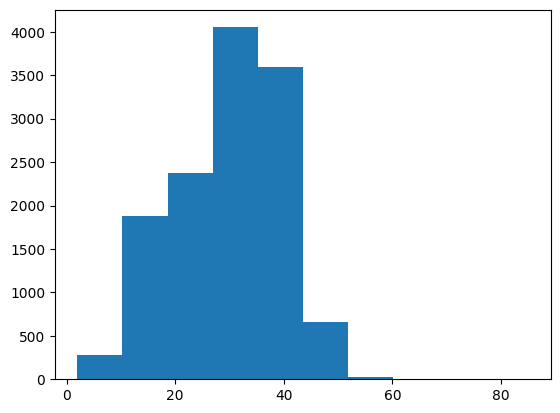

In [37]:
import matplotlib.pyplot as plt

plt.hist(list_length_tweets)
plt.show()

In [11]:
# A check if the corresponding paper is in the top 100
print(ranked_train['cord_uid'][0] in ranked_train['tfidf_topk'][0])

True


In [12]:
# Import references
PATH_COLLECTION_DATA = '../subtask4b_collection_data.pkl'
df_collection = pd.read_pickle(PATH_COLLECTION_DATA)
df_collection.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7718 entries, 162 to 1056448
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cord_uid          7718 non-null   object        
 1   source_x          7718 non-null   object        
 2   title             7718 non-null   object        
 3   doi               7677 non-null   object        
 4   pmcid             4959 non-null   object        
 5   pubmed_id         6233 non-null   object        
 6   license           7718 non-null   object        
 7   abstract          7718 non-null   object        
 8   publish_time      7715 non-null   object        
 9   authors           7674 non-null   object        
 10  journal           6668 non-null   object        
 11  mag_id            0 non-null      float64       
 12  who_covidence_id  528 non-null    object        
 13  arxiv_id          20 non-null     object        
 14  label             7718 n

In [13]:
df_collection.head()

,cord_uid,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,label,time,timet
162,umvrwgaw,PMC,Professional and Home-Made Face Masks Reduce E...,10.1371/journal.pone.0002618,PMC2440799,18612429,cc-by,BACKGROUND: Governments are preparing for a po...,2008-07-09,"van der Sande, Marianne; Teunis, Peter; Sabel,...",PLoS One,NaN,NaN,NaN,umvrwgaw,2008-07-09,1215561600
611,spiud6ok,PMC,The Failure of R (0),10.1155/2011/527610,PMC3157160,21860658,cc-by,"The basic reproductive ratio, R (0), is one of...",2011-08-16,"Li, Jing; Blakeley, Daniel; Smith?, Robert J.",Comput Math Methods Med,NaN,NaN,NaN,spiud6ok,2011-08-16,1313452800
918,aclzp3iy,PMC,Pulmonary sequelae in a patient recovered from...,10.4103/0970-2113.99118,PMC3424870,22919170,cc-by-nc-sa,The pandemic of swine flu (H1N1) influenza spr...,2012,"Singh, Virendra; Sharma, Bharat Bhushan; Patel...",Lung India,NaN,NaN,NaN,aclzp3iy,2012-01-01,1325376000
993,ycxyn2a2,PMC,What was the primary mode of smallpox transmis...,10.3389/fcimb.2012.00150,PMC3509329,23226686,cc-by,The mode of infection transmission has profoun...,2012-11-29,"Milton, Donald K.",Front Cell Infect Microbiol,NaN,NaN,NaN,ycxyn2a2,2012-11-29,1354147200
1053,zxe95qy9,PMC,"Lessons from the History of Quarantine, from P...",10.3201/eid1902.120312,PMC3559034,23343512,no-cc,"In the new millennium, the centuries-old strat...",2013-02-03,"Tognotti, Eugenia",Emerg Infect Dis,NaN,NaN,NaN,zxe95qy9,2013-02-03,1359849600


In [14]:
paper_info = df_collection.set_index('cord_uid')['abstract']
print(paper_info['3qvh482o'], '\n')
print(paper_info[:5])

This cross-sectional study examines rates of cognitive impairment among patients who survived COVID-19 and whether the care setting was associated with cognitive impairment rates. 

cord_uid
umvrwgaw    BACKGROUND: Governments are preparing for a po...
spiud6ok    The basic reproductive ratio, R (0), is one of...
aclzp3iy    The pandemic of swine flu (H1N1) influenza spr...
ycxyn2a2    The mode of infection transmission has profoun...
zxe95qy9    In the new millennium, the centuries-old strat...
Name: abstract, dtype: object


In [34]:
max_length_abstract = 0
sum_length_abstracts = 0
list_length_abstracts = []
paper_info_list = paper_info.values.tolist()
for abstract in paper_info_list:
    word_count = len(abstract.split(' '))
    sum_length_abstracts += word_count
    list_length_abstracts.append(word_count)
    if word_count > max_length_abstract:
        max_length_abstract = word_count

avg_length_abstracts = sum_length_abstracts/len(paper_info_list)

print("Maximum length of the abstracts: ", max_length_abstract)
print("Average length of an abstract: ", f'{avg_length_abstracts:.1f}')

Maximum length of the abstracts:  1234
Average length of an abstract:  232.0


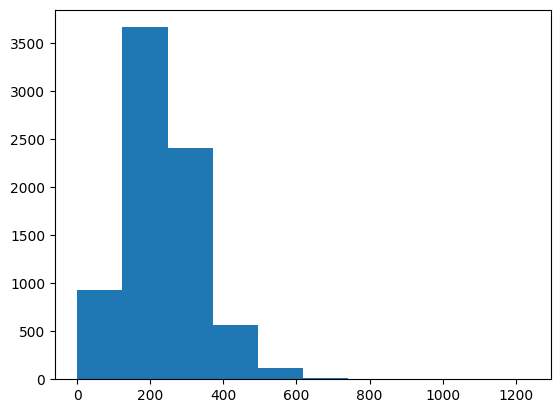

In [ ]:
plt.hist(list_length_abstracts)
plt.show()
